<a href="https://colab.research.google.com/github/codewithsheikh/Quantitative-Stock-and-Crypto-Price-Prediction-Using-Machine-Learning/blob/main/quantitative_stock_price_prediction_using_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Installing Required Libraries

In [ ]:
# Install libraries if needed
!pip install yfinance
!pip install plotly
!pip install pandas_ta
!pip install ta-lib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218909 sha256=6045c9e3d655c2ead52ebd5c283126d3c16ecc6898e3a61f68d907ed63ff4624
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 368.5/368.5 kB 6.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for ta-lib (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for ta-lib
Failed to build ta-lib
ERROR: ERROR: Failed to build installable wheels f

In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib


--2024-09-10 06:55:54--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-09-10 06:55:55--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://netactuate.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz?viasf=1 [following]
--2024-09-10 06:55:55--  http://netactuate.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz?viasf=1
Res

##Importing Required Libraries

In [ ]:
import yfinance as yf
import pandas as pd
import pandas_ta as ta
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt


##Fetching Market Data

In [ ]:
# Download historical data for Nvidia stock (NVDA)
ticker = 'NVDA'
data = yf.download(ticker, start="2018-09-09", end="2024-09-09", progress=False)

# Display the first few rows of the data
# data.head()
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-09-10,6.819250,6.898250,6.775000,6.868250,6.807210,220140000
2018-09-11,6.821500,6.910000,6.800500,6.820000,6.759389,243112000
2018-09-12,6.779750,6.799500,6.548000,6.705000,6.645411,419092000
2018-09-13,6.771500,6.875000,6.754000,6.783500,6.723214,305536000
2018-09-14,6.874750,6.977500,6.837500,6.910750,6.849331,386936000
...,...,...,...,...,...,...
2024-08-30,119.529999,121.750000,117.220001,119.370003,119.370003,333751600
2024-09-03,116.010002,116.209999,107.290001,108.000000,108.000000,477155100
2024-09-04,105.410004,113.269997,104.120003,106.209999,106.209999,372470300


##Data Preprocessing

In [ ]:
# Add Technical Indicators using pandas_ta
data['SMA50'] = ta.sma(data['Close'], length=50)   # 50-day Simple Moving Average
data['SMA200'] = ta.sma(data['Close'], length=200) # 200-day Simple Moving Average
data['RSI'] = ta.rsi(data['Close'], length=14)     # Relative Strength Index (RSI)
data['Bollinger High'], data['Bollinger Low'] = ta.bbands(data['Close'], length=20).iloc[:, [0, 2]]  # Bollinger Bands

# Show the data with new indicators
data.tail()


,Open,High,Low,Close,Adj Close,Volume,SMA50,SMA200,RSI,Bollinger High,Bollinger Low
Date,,,,,,,,,,,
2024-08-30,119.529999,121.750000,117.220001,119.370003,119.370003,333751600,120.0692,87.98068,49.295456,BBL_20_2.0,BBU_20_2.0
2024-09-03,116.010002,116.209999,107.290001,108.000000,108.000000,477155100,119.6978,88.27240,40.316209,BBL_20_2.0,BBU_20_2.0
2024-09-04,105.410004,113.269997,104.120003,106.209999,106.209999,372470300,119.4598,88.55901,39.108448,BBL_20_2.0,BBU_20_2.0
2024-09-05,104.989998,109.650002,104.760002,107.209999,107.209999,306850700,119.0822,88.84766,40.186481,BBL_20_2.0,BBU_20_2.0
2024-09-06,108.040001,108.150002,100.949997,102.830002,102.830002,413638100,118.6108,89.11532,37.089197,BBL_20_2.0,BBU_20_2.0


##Visualizing Market Data with Plotly

In [ ]:
# Create a subplot with two rows for Price and RSI
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    subplot_titles=(f'{ticker} Price with Indicators', 'RSI'),
                    vertical_spacing=0.1)

# Plot the Closing price with moving averages
fig.add_trace(go.Candlestick(x=data.index, open=data['Open'], high=data['High'], low=data['Low'], close=data['Close'], name="Price"), row=1, col=1)
fig.add_trace(go.Scatter(x=data.index, y=data['SMA50'], line=dict(color='blue', width=2), name="50 SMA"), row=1, col=1)
fig.add_trace(go.Scatter(x=data.index, y=data['SMA200'], line=dict(color='red', width=2), name="200 SMA"), row=1, col=1)

# Plot Bollinger Bands
fig.add_trace(go.Scatter(x=data.index, y=data['Bollinger High'], line=dict(color='green', width=1), name="Bollinger High", opacity=0.5), row=1, col=1)
fig.add_trace(go.Scatter(x=data.index, y=data['Bollinger Low'], line=dict(color='green', width=1), name="Bollinger Low", opacity=0.5), row=1, col=1)

# Plot the RSI
fig.add_trace(go.Scatter(x=data.index, y=data['RSI'], line=dict(color='orange', width=2), name="RSI"), row=2, col=1)

# Update layout for better visualization
fig.update_layout(height=800, width=1000, title_text=f'{ticker} Stock Price with Technical Indicators')
fig.update_yaxes(title_text="Price", row=1, col=1)
fig.update_yaxes(title_text="RSI", row=2, col=1)

# Show the plot
fig.show()


#Building a Simple Predictive Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Prepare the features (SMA50, SMA200, RSI) and drop NaN values
features = data[['SMA50', 'SMA200', 'RSI']].dropna()

# Shift the labels for predicting the next day's closing price and drop NaNs
labels = data['Close'].shift(-1).dropna()

# Align the indices by joining features and labels on the common index
# First, drop any rows where either features or labels are NaN
features, labels = features.align(labels, join='inner', axis=0)

# Now split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the closing price for the test set
predictions = model.predict(X_test)

# Show the predictions vs actual prices
predictions_df = pd.DataFrame({'Predicted': predictions, 'Actual': y_test})
# predictions_df.head()
predictions_df


,Predicted,Actual
Date,,
2023-07-06,39.398207,42.502998
2023-08-24,48.463577,46.018002
2022-03-29,29.102184,27.690001
2022-05-26,20.727031,18.811001
2022-05-09,18.150410,17.594999
...,...,...
2021-10-01,18.357449,19.732000
2020-01-15,8.028518,6.223250
2023-01-04,12.911356,14.265000


from matplotlib import pyplot as plt
predictions_df['Predicted'].plot(kind='hist', bins=20, title='Predicted')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
predictions_df['Actual'].plot(kind='hist', bins=20, title='Actual')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
predictions_df.plot(kind='scatter', x='Predicted', y='Actual', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
predictions_df['Predicted'].plot(kind='line', figsize=(8, 4), title='Predicted')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
predictions_df['Actual'].plot(kind='line', figsize=(8, 4), title='Actual')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
from matplotlib import pyplot as plt
predictions_df.plot(kind='scatter', x='Predicted', y='Actual', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

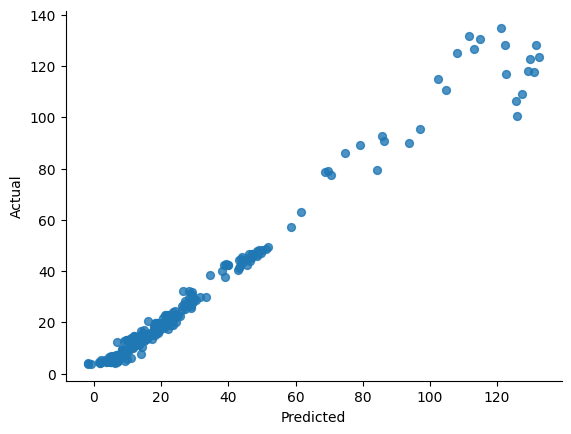

In [ ]:
# @title Predicted vs Actual

from matplotlib import pyplot as plt
predictions_df.plot(kind='scatter', x='Predicted', y='Actual', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from matplotlib import pyplot as plt
predictions_df.plot(kind='scatter', x='Predicted', y='Actual', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

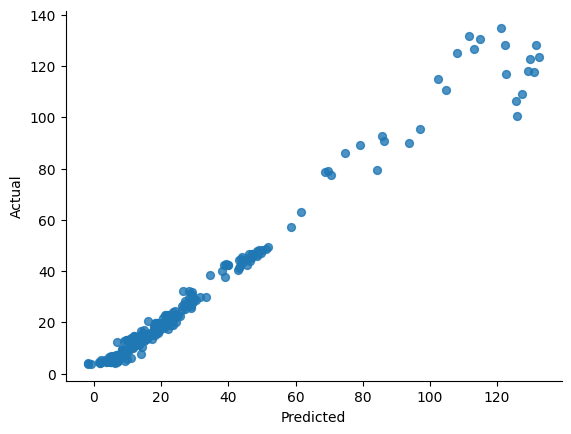

In [ ]:
# @title Predicted vs Actual

from matplotlib import pyplot as plt
predictions_df.plot(kind='scatter', x='Predicted', y='Actual', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

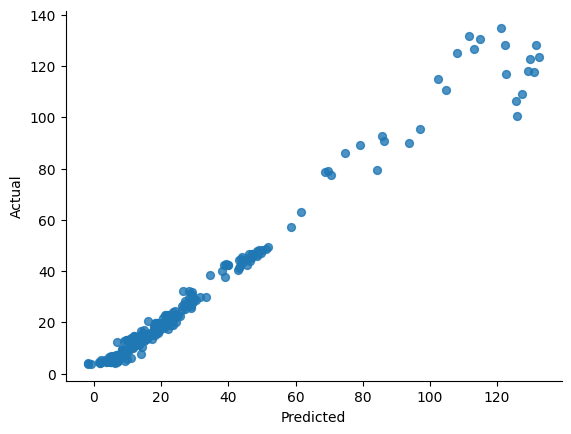

In [ ]:
# @title Predicted vs Actual

from matplotlib import pyplot as plt
predictions_df.plot(kind='scatter', x='Predicted', y='Actual', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

##Evaluating Model Performance

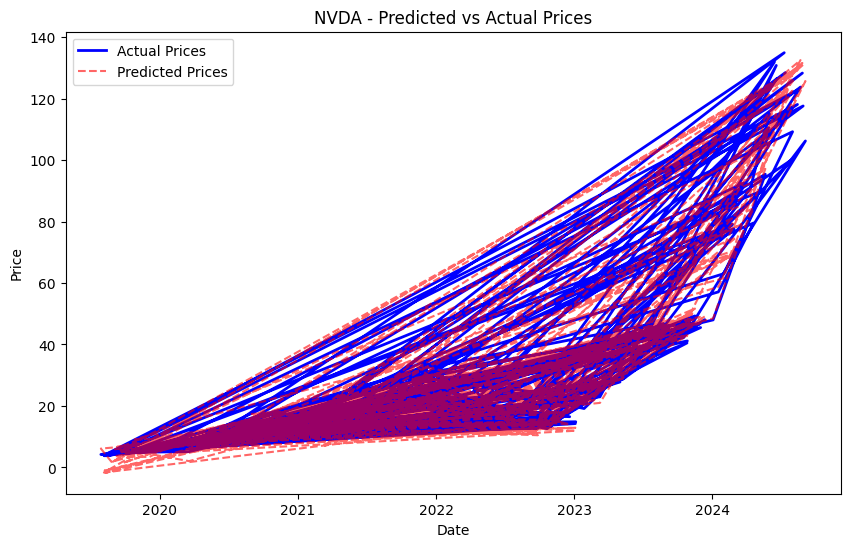

In [ ]:
plt.figure(figsize=(10, 6))

# Plot the actual and predicted prices
plt.plot(y_test.index, y_test, label='Actual Prices', color='blue', linewidth=2)
plt.plot(y_test.index, predictions, label='Predicted Prices', color='red', alpha=0.6, linestyle='--')

# Add title and labels
plt.title('NVDA - Predicted vs Actual Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Show plot
plt.show()

In [ ]:
import plotly.graph_objects as go

# Create a new figure
fig = go.Figure()

# Add actual prices line (blue) with markers
fig.add_trace(go.Scatter(x=y_test.index, y=y_test,
                         mode='lines+markers',
                         name='Actual Prices',
                         line=dict(color='blue', width=2),
                         marker=dict(size=6)))

# Add predicted prices line (red dashed)
fig.add_trace(go.Scatter(x=y_test.index, y=predictions,
                         mode='lines',
                         name='Predicted Prices',
                         line=dict(color='red', width=2, dash='dash')))

# Customize layout
fig.update_layout(
    title="NVDA - Predicted vs Actual Prices",
    xaxis_title="Date",
    yaxis_title="Price",
    legend_title="Legend",
    font=dict(
        family="Courier New, monospace",
        size=14,
        color="RebeccaPurple"
    ),
    hovermode="x unified",  # Tooltip on hover
    height=600,
    width=1000
)

# Show the plot
fig.show()
